# Chương 4. HỌC MÁY

## Mô hình Decision tree

Thuật toán Decision Tree là thuật toán dựa trên mô hình cây, có cấu trúc phân loại hay còn được gọi là rẽ nhánh bao gồm các thành phần nút gốc (root node), nút trong (internal node), nút lá (leaf node) và nhánh (branch) để đưa ra quyết định từ một tập hợp các điểm dữ liệu đầu vào.

<p align="center">
  <img src="picture/Decision tree diagrams.drawio.png" width="600">
  <br>
  <em>Hình 1. Cấu trúc của một cây quyết định bao gồm nút gốc (root node), nút trong (internal node) và nút lá (leaf node).</em>
</p>


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Đọc dữ liệu
col = pd.read_csv(r'data/College.csv')

# 2. Tiền xử lý
col = col[['Top10perc', 'PhD', 'Terminal', 'perc.alumni', 'Grad.Rate',
           'Top25perc', 'S.F.Ratio', 'Private', 'Expend']]
col['Private'] = col['Private'].map({'Yes': 1, 'No': 0})

# 3. Tách biến độc lập và phụ thuộc
X = col.drop(columns=['Private'])
y = col['Private']

# 4. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Huấn luyện mô hình SVM đơn giản (kernel mặc định = 'rbf')
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(X_train, y_train)

# 7. Dự đoán và đánh giá
y_pred = decision_tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy (Độ chính xác):", acc)

Accuracy (Độ chính xác): 0.782051282051282


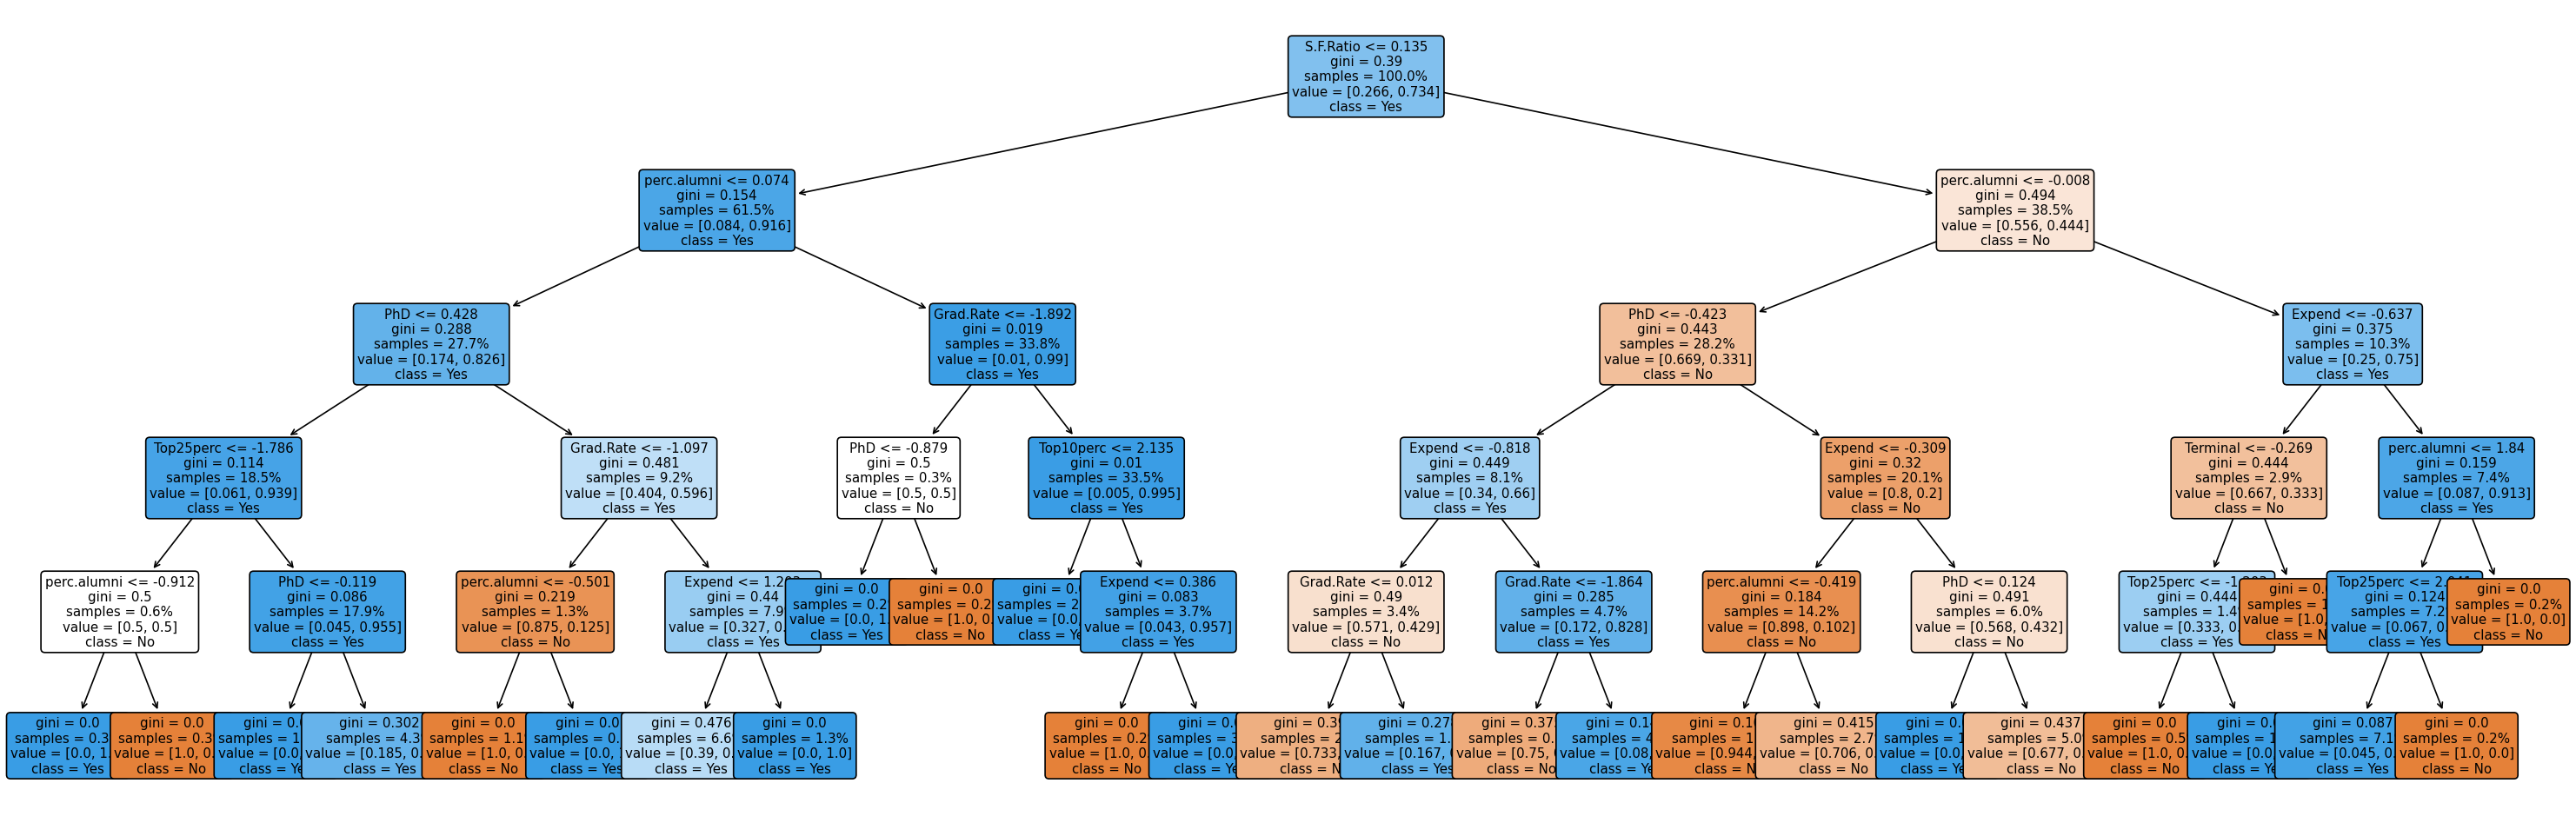

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

# Lưu lại tên cột trước khi chuẩn hóa để gắn nhãn nút
feature_names = X.columns.tolist()
class_names = ['No', 'Yes']  # 0 -> No, 1 -> Yes

plt.figure(figsize=(25, 8), dpi=120)
tree.plot_tree(
    decision_tree_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,           # tô màu theo class/impurity
    rounded=True,          # bo góc cho dễ nhìn
    impurity=True,         # hiển thị gini/entropy (mặc định gini)
    proportion=True,       # tỷ lệ mẫu tại nút
    fontsize=9
)
plt.tight_layout()
plt.show()
